NAMA : HELTI YUNIAR

NIM : 09011181722080

KELAS  : SK5B

MATA KULIAH : ACTIFICIAL INTELEGENT

# PENERAPAN LOGIKA FUZZY UNTUK MENENTUKAN MINAT WISATA BAGI MASYARAKAT DI KOTA BATAM MENGGUNAKAN METODE MAMDANI
 

sistem ini bertujuan untuk mengetahui seberapa banyak peminat wisata yang ada di batam dengan menggunakan metode fuzzy mamdani.
pada sistem ini terdapat tiga input(jarak,fasilitas,harga tiket)  dan menghasilkan satu output(minat wisata). input dan output 
itu sendiri masing-masing memiliki kriteria, seperti jarak memiliki kriteria jauh , sedang , dan dekat . Input fasilitas 
memiliki kriteria ada dan tidak ada sedangkan harga memiliki kriteria murah,sedang, dan mahal . Untuk output minat wisata juga 
memiliki bebrapa kriteria yaitu tidak berminat , cukup berminat, dan sangat berminat. 

### Input
1. Jarak
    - Dekat 
    - Sedang
    - Jauh

2. Fasilitas
    - Tidak ada
    - Ada

3. Harga tiket
    - Murah
    - Sedang
    - Mahal
    

### Output

Minat wisata
   - Tidak berminat
   - Cukup berminat
   - Sangat berminat


In [1]:
# memanggil library yang akan digunakan
# skfuzzy merupakan library fuzzy logic pada python yang bekerja dalam numpy array

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
#mendefinisikan batas nilai dai masing-masing input dan output
JRK = ctrl.Antecedent(np.arange(0,80,1),'Jarak')
FAS = ctrl.Antecedent(np.arange(0,1,0.1),'Fasilitas')
BYA = ctrl.Antecedent(np.arange(0,15,1),'Biaya')
MW = ctrl.Consequent(np.arange(0,80,1),'Minat Wisata')

## 1. Fuzzifikasi
Fuzzy Logic adalah sebuah metode yang solid dan efisien untuk memecahkan masalah pemetaan non-linier yang tidak memprioritaskan presisi. Fungsi Keanggotaan  Fungsi keanggotaan (membership function) adalah suatu kurva yang menunjukkan pemetaan titik-titik input data ke dalam nilai keanggotaanya ( sering juga disebut dengan derajat keanggotaan) yang memiliki interval antara 0 dan 1

Fungsi Keanggotaan  Fungsi keanggotaan (membership function) adalah suatu kurva yang menunjukkan pemetaan titik-titik input data ke dalam nilai keanggotaanya ( sering juga disebut dengan derajat keanggotaan) yang memiliki interval antara 0 dan 1. 

### Membership function variabel input

1. Fungsi keanggotaan jarak ada 3 yaitu


$ \mu Dekat [x] = 
\left\{
    \begin{array}{80}
       0 & \mbox{; } x \leq 40 \\
       {40-x \over 40-20} & \mbox{; } 20 < x < 40\\
       1 & \mbox{; } 1 \leq x \leq 20
    \end{array}
\right.$



$ \mu Sedang [x] = 
\left\{
    \begin{array}{80}
       0 & \mbox{; } 60 < x < 20 \\
       {40-x \over 40-20} & \mbox{; } 20 < x \leq 40 \\
       {60-x \over 60-40} & \mbox{; } 40 < x < 60\\
       1 & \mbox{; }  x = 40
    \end{array}
\right.$



$ \mu Jauh [x] = 
\left\{
    \begin{array}{80}
       0 & \mbox{; }  x \leq 40 \\
       {60-x \over 60-40} & \mbox{; } 40 < x < 60 \\
       1 & \mbox{; } 60 < x \leq 80
    \end{array}
\right.$


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


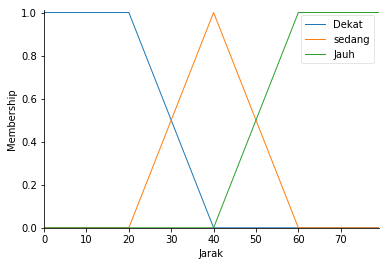

In [3]:
JRK['Dekat'] =fuzz.trapmf(JRK.universe,[0,0,20,40]) #trapmf agar grafik yang ditampilkan berbentuk trapesium
JRK['sedang'] =fuzz.trimf(JRK.universe,[20,40,60]) #trimf agar grafik yang ditampilkan berupa segitiga
JRK['Jauh'] =fuzz.trapmf(JRK.universe,[40,60,80,80])
JRK.view()

2. Fungsi keanggotaan Fasilitas ada 2 yaitu


$ \mu Tidak ada [x] = 
\left\{
    \begin{array}{1}
       0 & \mbox{; } x > 0.3 \\
       {0.3-x \over 0.3 - 0.25} & \mbox{; } 0.25 < x < 0.3\\
       1 & \mbox{; }  x \leq 0.25
    \end{array}
\right.$




$ \mu Ada [x] = 
\left\{
    \begin{array}{1}
       0 & \mbox{; } x < 0.25 \\
       {0.3-x \over 0.3-0.25} & \mbox{; } 0.25 < x \leq 0.3 \\
       1 & \mbox{; }  x > 0.3
    \end{array}
\right.$



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


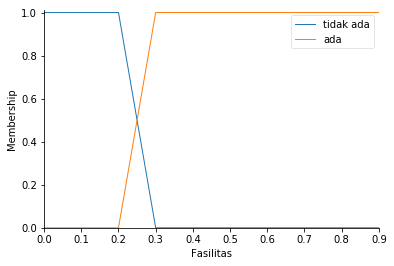

In [4]:
FAS['tidak ada'] = fuzz.trapmf(FAS.universe,[0, 0, 0.25,0.25])
FAS['ada'] = fuzz.trapmf(FAS.universe,[0.25,0.25,1,1])
FAS.view()

3. Fungsi keanggotaan harga masuk ada 3 yaitu


$ \mu Murah [x] = 
\left\{
    \begin{array}{15}
       0 & \mbox{; } x > 6 \\
       {6-x \over 6-3} & \mbox{; } 3 \leq  x \leq 6\\
       1 & \mbox{; } 0 < x < 3
    \end{array}
\right.$



$ \mu Sedang [x] = 
\left\{
    \begin{array}{15}
       0 & \mbox{; } 9 < x < 3 \\
       {6-x \over 6-3} & \mbox{; } 3 \leq x < 6 \\
       {9-x \over 9-6} & \mbox{; } 6 < x \leq 9 \\
       1 & \mbox{; }  x = 6
    \end{array}
\right.$



$ \mu Mahal [x] = 
\left\{
    \begin{array}{15}
       0 & \mbox{; }  x \leq 6 \\
       {9-x \over9-6} & \mbox{; } 6 \leq x \leq 9 \\
       1 & \mbox{; } 9 < x \leq 15
    \end{array}
\right.$


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


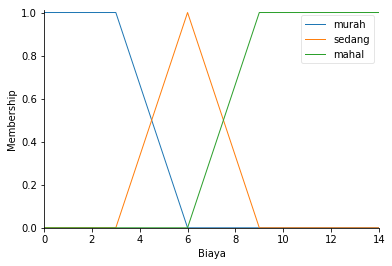

In [5]:
BYA['murah'] = fuzz.trapmf(BYA.universe,[0,0,3,6])
BYA['sedang'] = fuzz.trimf(BYA.universe,[3,6,9])
BYA['mahal'] = fuzz.trapmf(BYA.universe,[6,9,15,15])
BYA.view()

### Membership fuction variabel output

Fungsi keanggotaan minat wisata ada 3 yaitu


$ \mu Tidak berminat [x] = 
\left\{
    \begin{array}{80}
       0 & \mbox{; } x \leq 40 \\
       {40-x \over 40-20} & \mbox{; } 20 < x < 40\\
       1 & \mbox{; } 1 \leq x \leq 20
    \end{array}
\right.$



$ \mu Cukup berminat [x] = 
\left\{
    \begin{array}{80}
       0 & \mbox{; } 60 < x < 20 \\
       {40-x \over 40-20} & \mbox{; } 20 < x \leq 40 \\
       {60-x \over 60-40} & \mbox{; } 40 < x < 60\\
       1 & \mbox{; }  x = 40
    \end{array}
\right.$



$ \mu Sangat berminat [x] = 
\left\{
    \begin{array}{80}
       0 & \mbox{; }  x \leq 40 \\
       {60-x \over 60-40} & \mbox{; } 40 < x < 60 \\
       1 & \mbox{; } 60 < x \leq 80
    \end{array}
\right.$



C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


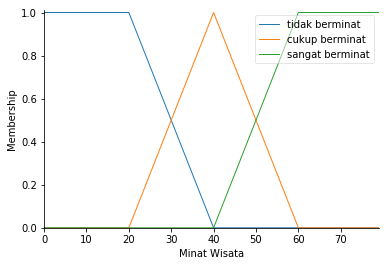

In [6]:
MW['tidak berminat'] =fuzz.trapmf(MW.universe,[0,0,20,40])
MW['cukup berminat'] =fuzz.trimf(MW.universe,[20,40,60])
MW['sangat berminat'] =fuzz.trapmf(MW.universe,[40,60,80,80])
MW.view()

## 2. Operasi fuzzy dan imlikasi / Rule base

Fuzzy Inference System Sistem inferensi fuzzy (FIS) disebut juga Fuzzy Inference engine adalah sistem yang dapat melakukan penalaran dengan prinsip serupa seperti manusia melakukan penalaran dengan nalurinya. Terdapat beberapa jenis FIS yang dikenal yaitu Sugeno dan Mamdani (Indrabayu, 2012). 

Berikut bentuk analisis data yang akan dilakukan di dalam penelitian yang dilakukan. 

                                                    Tabel 3.1 Analisis Data 

|Input    |  Proses  | Keputusan  |
|---------|----------|------------|
|Jarak    |          |            |
|Fasilitas|Mamdani   |Minat wisata|
|Biaya    |          |            |




|  Fungsi    |  Nama Variabel    |Batas nilai|
|------------|-------------------|-----------|
|            | Jarak             | 0-80      |
|input       | Fasilitas         |0-1        |
|            |Harga masuk        | 0-15      |
|Output      | Minat wisata      | 0-80      |

Rule base
1. Jika(Jarak=dekat)  dan (Fasilitas = tidak ada) dan (Biaya = Murah) maka tidak berminat
2. Jika(Jarak= dekat) dan (fasilitas=ada)         dan (Biaya = Murah) maka berminat
3. Jika(Jarak=Sedang) dan (Fasilitas=tidak ada )  dan (Biaya = Murah) maka tidak berminat
4. Jika(Jarak=Sedang) dan (fasilitas=ada)         dan (Biaya = Murah) maka berminat
5. Jika(Jarak=Jauh    dan (fasilitas=ada)         dan (Biaya = Murah) maka berminat
6. Jika(Jarak=Jauh    dan Fasilitas=tidak ada )   dan (Biaya = Murah) maka tidak berminat
7. Jika(Jarak=dekat   dan (Fasilitas=tidak ada )  dan (Biaya = sedang)maka tidak berminat
8. Jika(Jarak=dekat   dan (fasilitas=ada)         dan (Biaya = sedang)maka tidak berminat
9. Jika(Jarak=Sedang  dan Fasilitas=tidak ada )   dan (Biaya = sedang)maka tidak berminat
10. Jika(Jarak=Sedang  dan (fasilitas=ada)         dan (Biaya = sedang)maka cukup berminat
11. Jika(Jarak=Jauh    dan (Fasilitas=tidak ada )  dan (Biaya = sedang)maka tidak berminat
12. Jika(Jarak=Jauh    dan (fasilitas=ada)         dan (Biaya = sedang)maka berminat 
13. Jika(Jarak=dekat   dan (Fasilitas=tidak ada )  dan ( Biaya = mahal)maka tidak berminat
14. Jika(Jarak=dekat   dan (fasilitas=ada)         dan ( Biaya = mahal)maka cukup berminat
15. Jika(Jarak=Sedang  dan (Fasilitas=tidak ada )  dan ( Biaya = mahal)maka tidak berminat
16. Jika(Jarak=Sedang  dan (fasilitas=ada)         dan ( Biaya = mahal)maka cukup berminat
17. Jika(Jarak=Jauh    dan (Fasilitas=tidak ada )  dan ( Biaya = mahal)maka tidak berminat
18. Jika(Jarak=Jauh    dan (fasilitas=ada)         dan ( Biaya = mahal)maka cukup berminat












In [9]:
rule1 = ctrl.Rule(JRK['Dekat'] & FAS['tidak ada']&BYA['murah'], MW['tidak berminat'])
rule2 = ctrl.Rule(JRK['Dekat'] & FAS['ada']&BYA['murah'], MW['sangat berminat'])
rule3 = ctrl.Rule(JRK['sedang'] & FAS['tidak ada']&BYA['murah'], MW['tidak berminat'])
rule4 = ctrl.Rule(JRK['sedang'] & FAS['ada']&BYA['murah'], MW['sangat berminat'])
rule5 = ctrl.Rule(JRK['Jauh'] & FAS['tidak ada']&BYA['murah'], MW['tidak berminat'])
rule6 = ctrl.Rule(JRK['Jauh'] & FAS['ada']&BYA['murah'], MW['sangat berminat'])
rule7 = ctrl.Rule(JRK['Dekat'] & FAS['tidak ada']&BYA['sedang'], MW['tidak berminat'])
rule8 = ctrl.Rule(JRK['Dekat'] & FAS['ada']&BYA['sedang'], MW['tidak berminat'])
rule9 = ctrl.Rule(JRK['sedang'] & FAS['tidak ada']&BYA['sedang'], MW['tidak berminat'])
rule10 = ctrl.Rule(JRK['sedang'] & FAS['ada']&BYA['sedang'], MW['cukup berminat'])
rule11= ctrl.Rule(JRK['Jauh'] & FAS['tidak ada']&BYA['sedang'], MW['tidak berminat'])
rule12 = ctrl.Rule(JRK['Jauh'] & FAS['ada']&BYA['sedang'], MW['sangat berminat'])
rule13 = ctrl.Rule(JRK['Dekat'] & FAS['tidak ada']&BYA['mahal'], MW['tidak berminat'])
rule14 = ctrl.Rule(JRK['Dekat'] & FAS['ada']&BYA['mahal'], MW['cukup berminat'])
rule15 = ctrl.Rule(JRK['sedang'] & FAS['tidak ada']&BYA['mahal'], MW['tidak berminat'])
rule16 = ctrl.Rule(JRK['Dekat'] & FAS['ada']&BYA['mahal'], MW['cukup berminat'])
rule17 = ctrl.Rule(JRK['Dekat'] & FAS['tidak ada']&BYA['mahal'], MW['tidak berminat'])
rule18 = ctrl.Rule(JRK['Dekat'] & FAS['ada']&BYA['mahal'], MW['cukup berminat'])




(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26daa26e438>)

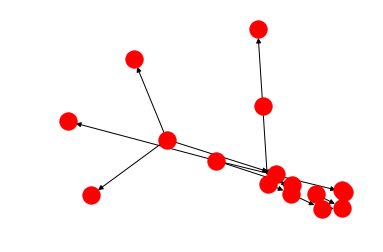

In [8]:
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26daa244240>)

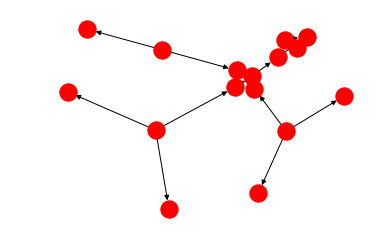

In [13]:
rule2.view()

## 3. Fuzzy interface

In [11]:
Minat_rule1 = ctrl.ControlSystem ([rule1,rule2,rule3,rule4,rule5,rule6,
                                   rule7,rule8,rule9,rule10,rule11,rule12,
                                   rule13,rule14,rule15,rule16,rule17,rule18])

In [12]:
Minat_rule = ctrl.ControlSystemSimulation(Minat_rule1) #menggunkan mode simulasi kontrol

## 4. Defuzzyfikasi

In [29]:
JRK = input('Jarak : ')
FAS = input('Fasilitas :')
BYA = input('Biaya :')

Jarak : 25
Fasilitas :1
Biaya :10


In [30]:
Minat_rule.input['Jarak'] = float(JRK)
Minat_rule.input['Fasilitas'] = float(FAS)
Minat_rule.input['Biaya'] = float(BYA)

Minat_rule.compute()

39.99999999999999


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


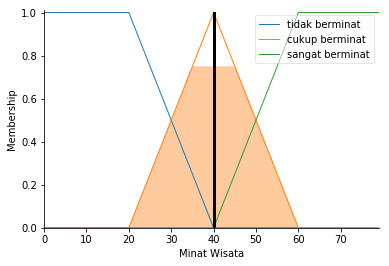

In [31]:
print(Minat_rule.output['Minat Wisata'])
MW.view(sim=Minat_rule)

### Penghitungan manual

Minat wisata

 $$Minat wisata = \frac{(40 \times 5) + (46.66 \times 3.75) + (43.33 \times 3.75) + (46.66 \times 5 )}{5+3.75+3.75+5} $$
 
 $$ Minat wisata = \frac{200 + 174.97 + 145.15 + 4.8}{17.5} $$
 
 $$ Minat wisata = \frac{753.42}{17.5} $$
 
 $$ Minat wisata = 43.05 \,  $$